In [5]:
import matplotlib as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [6]:
df = pd.concat(
    map(pd.read_csv, [r"C:\Users\prana\Desktop\PROJECT\dataset\subjecta-concentrating-1.csv", r"C:\Users\prana\Desktop\PROJECT\dataset\subjecta-neutral-1.csv",r"C:\Users\prana\Desktop\PROJECT\dataset\subjecta-relaxed-1.csv"]), ignore_index=True)

In [7]:
print(df)

         timestamps     TP9     AF7      AF8    TP10  Right AUX  Label
0      1.533223e+09  59.105  28.320   15.137  12.207     54.199    NaN
1      1.533223e+09  62.012  30.273   43.945  11.719     79.102    NaN
2      1.533223e+09  44.922  30.273  -97.656  11.230     32.715    NaN
3      1.533223e+09  28.809  27.832 -110.352   9.277     29.785    NaN
4      1.533223e+09  36.156  28.809  -73.242  11.230     50.781    NaN
...             ...     ...     ...      ...     ...        ...    ...
45595  1.533059e+09  28.809  25.391   26.855  16.113    -31.250    NaN
45596  1.533059e+09  20.020  27.344   28.809   9.766     -6.836    NaN
45597  1.533059e+09  28.809  31.738   29.297  14.160     71.289    NaN
45598  1.533059e+09  35.156  29.297   23.926  14.160     53.223    NaN
45599  1.533059e+09  30.273  27.344   24.414  15.625     34.180    NaN

[45600 rows x 7 columns]


In [8]:
df1 = pd.read_csv(r"C:\Users\prana\Desktop\PROJECT\dataset\subjecta-concentrating-1.csv")

In [9]:
print(df1)

         timestamps     TP9     AF7      AF8    TP10  Right AUX  Label
0      1.533223e+09  59.105  28.320   15.137  12.207     54.199    NaN
1      1.533223e+09  62.012  30.273   43.945  11.719     79.102    NaN
2      1.533223e+09  44.922  30.273  -97.656  11.230     32.715    NaN
3      1.533223e+09  28.809  27.832 -110.352   9.277     29.785    NaN
4      1.533223e+09  36.156  28.809  -73.242  11.230     50.781    NaN
...             ...     ...     ...      ...     ...        ...    ...
15187  1.533223e+09  25.391  33.203 -388.672  22.461     19.043    NaN
15188  1.533223e+09  35.645  33.203 -136.230  24.902      0.977    NaN
15189  1.533223e+09  48.828  31.250  258.789  38.086    -15.137    NaN
15190  1.533223e+09  50.293  31.250  264.160  39.551     -5.859    NaN
15191  1.533223e+09  45.410  30.273   27.344  39.062     49.805    NaN

[15192 rows x 7 columns]


In [10]:
for i in range(0,45600):
    if i<=15192:
        df.loc[i ,'Label'] = '0'
    elif (i >= 15192 and i<=30396):
        df.loc[i ,'Label'] = '1'
    else:
        df.loc[i ,'Label'] = '2'

In [11]:
print(df)

         timestamps     TP9     AF7      AF8    TP10  Right AUX Label
0      1.533223e+09  59.105  28.320   15.137  12.207     54.199     0
1      1.533223e+09  62.012  30.273   43.945  11.719     79.102     0
2      1.533223e+09  44.922  30.273  -97.656  11.230     32.715     0
3      1.533223e+09  28.809  27.832 -110.352   9.277     29.785     0
4      1.533223e+09  36.156  28.809  -73.242  11.230     50.781     0
...             ...     ...     ...      ...     ...        ...   ...
45595  1.533059e+09  28.809  25.391   26.855  16.113    -31.250     2
45596  1.533059e+09  20.020  27.344   28.809   9.766     -6.836     2
45597  1.533059e+09  28.809  31.738   29.297  14.160     71.289     2
45598  1.533059e+09  35.156  29.297   23.926  14.160     53.223     2
45599  1.533059e+09  30.273  27.344   24.414  15.625     34.180     2

[45600 rows x 7 columns]


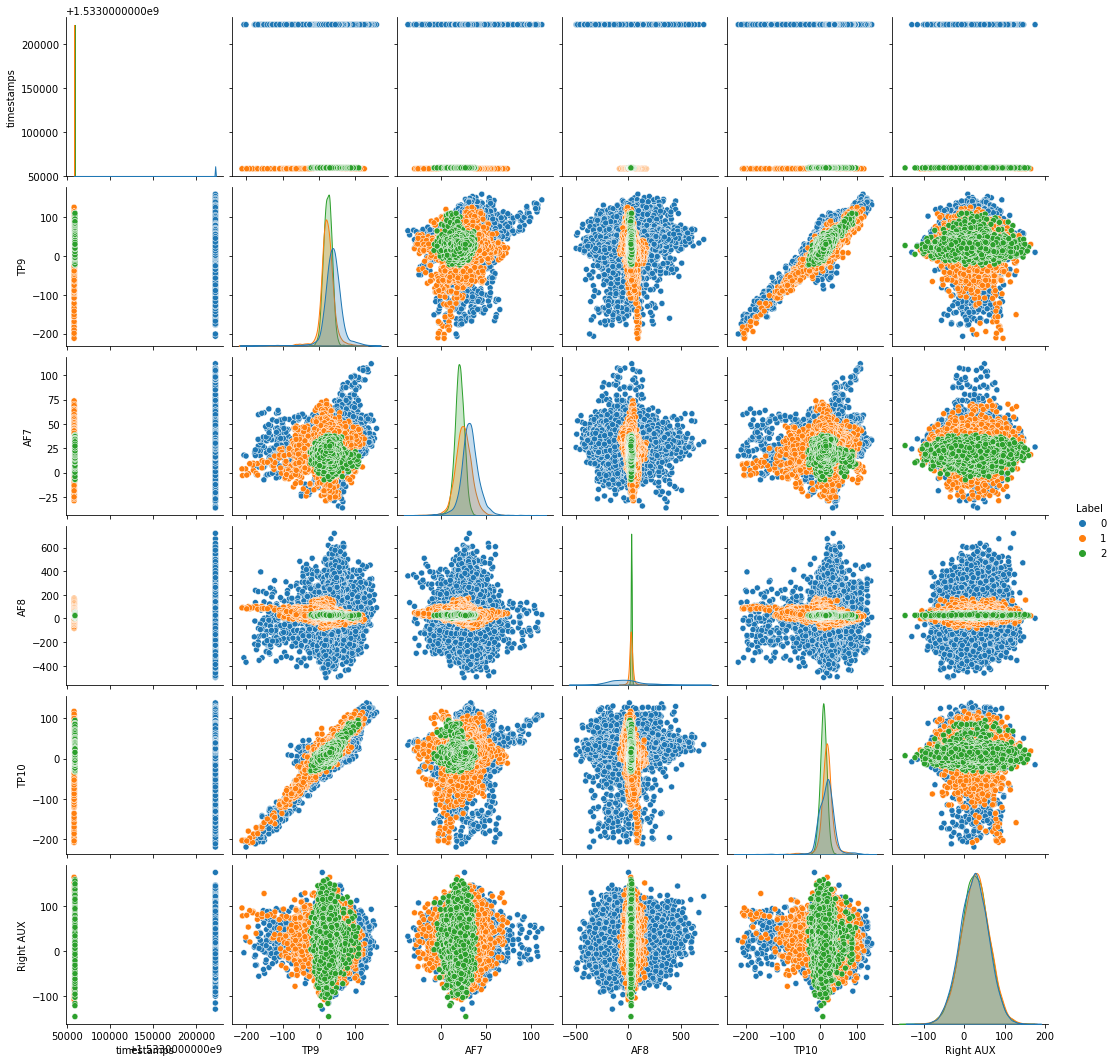

In [12]:
sns.pairplot(df,hue='Label')

In [13]:
df = df.sample(frac=1).reset_index(drop=True)

In [14]:
df.head(10000)

,timestamps,TP9,AF7,AF8,TP10,Right AUX,Label
0,1.533059e+09,33.691,29.785,23.438,11.719,52.734,2
1,1.533058e+09,23.926,18.555,23.926,16.113,30.762,1
2,1.533058e+09,38.086,30.762,53.223,42.480,5.859,1
3,1.533223e+09,30.273,29.785,-173.340,27.344,42.969,0
4,1.533059e+09,17.578,14.648,28.809,6.836,29.785,2
...,...,...,...,...,...,...,...
9995,1.533059e+09,27.344,22.949,32.227,13.672,-31.738,2
9996,1.533058e+09,36.621,27.832,26.855,29.297,62.500,1
9997,1.533058e+09,34.180,28.809,27.832,29.297,-16.113,1
9998,1.533059e+09,15.137,24.414,34.180,12.695,-1.465,2


In [15]:
y = df['Label'].copy()
X = df.drop('Label', axis=1).copy()

In [40]:
print(y)

0        2
1        1
2        1
3        0
4        2
        ..
45595    1
45596    0
45597    1
45598    1
45599    2
Name: Label, Length: 45600, dtype: object


In [41]:
print(X)

         timestamps     TP9     AF7      AF8    TP10  Right AUX
0      1.533059e+09  33.691  29.785   23.438  11.719     52.734
1      1.533058e+09  23.926  18.555   23.926  16.113     30.762
2      1.533058e+09  38.086  30.762   53.223  42.480      5.859
3      1.533223e+09  30.273  29.785 -173.340  27.344     42.969
4      1.533059e+09  17.578  14.648   28.809   6.836     29.785
...             ...     ...     ...      ...     ...        ...
45595  1.533058e+09  25.391  20.996   15.137  12.207     -4.883
45596  1.533223e+09  11.719  30.273 -131.836  -5.859    -15.137
45597  1.533058e+09  43.945  16.602   23.438  27.832     61.523
45598  1.533058e+09   9.277  18.066   19.043   9.277     41.504
45599  1.533059e+09   8.301  14.160   29.297   9.766     16.113

[45600 rows x 6 columns]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
print(knn.score(X_test, y_test))

1.0


In [29]:
val1 = df.iloc[[4]]

In [30]:
print(val1)

     timestamps     TP9     AF7     AF8   TP10  Right AUX Label
4  1.533059e+09  17.578  14.648  28.809  6.836     29.785     2


In [31]:
knn.predict(X_test)

array(['2', '0', '0', ..., '0', '0', '0'], dtype=object)

In [32]:
import pickle

In [33]:
pickle.dump(knn, open('model.pkl','wb'))

In [34]:
model = pickle.load(open('model.pkl','rb'))

In [42]:
from sklearn.model_selection import KFold
from sklearn import tree
model = tree.DecisionTreeClassifier()
kfold_validation = KFold(100)

In [43]:
import numpy as np
from sklearn.model_selection import cross_val_score
results = cross_val_score(knn,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99780702 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99780702
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
0.

In [46]:
from sklearn.model_selection import StratifiedKFold
skfold =StratifiedKFold(n_splits = 10)
scr = cross_val_score(knn,X,y,cv=skfold)
print(scr)

[0.9997807 1.        1.        1.        1.        1.        1.
 0.9997807 1.        1.       ]


In [47]:
import tensorflow

In [48]:
print(tensorflow.__version__)

2.7.0
